<a href="https://colab.research.google.com/github/ChJazhiel/HPC_II/blob/main/Taller%20GANs/Operations_latent_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones en el espacio de latencia

In [ ]:
# Importar librerías
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [ ]:
# Configuración de CPU o GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

Device: cpu


In [ ]:
# Descargar modelo preentrenado
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub','PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=device)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth
100%|██████████| 264M/264M [00:09<00:00, 29.5MB/s]


Average network found !


In [ ]:
num_images = 40 # Número de imágenes a generar
torch.manual_seed(42) # Fijar semilla para reproducubilidad
noise, _ = model.buildNoiseData(num_images) # Generar vectores de ruido

In [ ]:
# Generar imágenes con vector de ruido
with torch.no_grad():
    generated_images = model.test(noise)
print(f"Tamaño de las imágenes generadas: {generated_images.shape}")

Tamaño de las imágenes generadas: torch.Size([40, 3, 512, 512])


In [ ]:
# Función para visualizar imágenes
def print_grid(images,nrow=8):
    grid = torchvision.utils.make_grid(images.clamp(min=-1, max=1),nrow=nrow, scale_each=True, normalize=True)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.show()

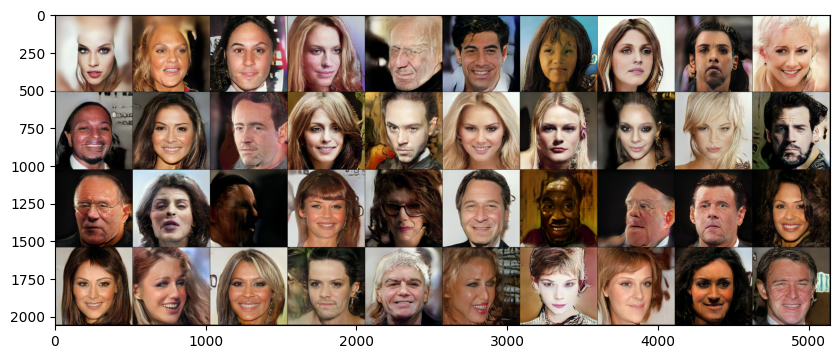

In [ ]:
print_grid(generated_images,10)

# Interpolación lineal

In [ ]:
# Interporlar entre dos imágenes
def interpolate_images(latentvec_img_1, latentvec_img_2, steps=10):
    '''
    Input:
    - latentvec_img1 Vector en el espacio de latencia de rostro 1.
    - latentvec_img2 Vector en el espacio de latencia de rostro 2.
    - steps Número de pasos para interpolar
    '''
    ratios = np.linspace(0, 1, steps) # vector de 0 a 1 en n_steps
    latentvec_interpolaion = list()
    for ratio in ratios:
        v = (1.0 - ratio) * latentvec_img_1 + ratio * latentvec_img_2
        latentvec_interpolaion.append(v)
    return latentvec_interpolaion

In [ ]:
# Interpolar entre dos rostros
lv_interpolation = interpolate_images(noise[1], noise[2], steps=5)

In [ ]:
print(f"Número de pasos: {len(lv_interpolation)}")
print(f"Tamaño: {lv_interpolation[0].shape}")

Número de pasos: 5
Tamaño: torch.Size([512])


In [ ]:
# Juntar todos los vectores en un tensor
stacked_tensor = torch.stack(lv_interpolation)
print(f"Tamaño: {stacked_tensor.shape}")

Tamaño: torch.Size([5, 512])


In [ ]:
# Generar imágenes interpoladas
with torch.no_grad():
    interpolated_images = model.test(stacked_tensor)

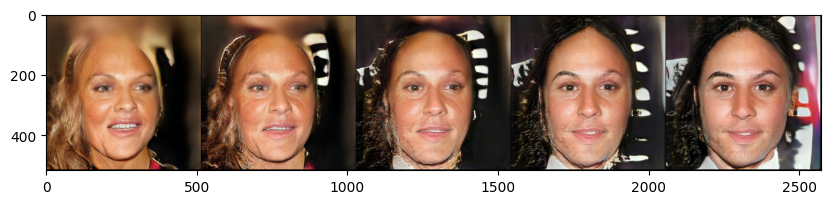

In [ ]:
# Visualizar imágenes interpoladas
print_grid(interpolated_images,5)

# Aritmética en el espacio de latencia

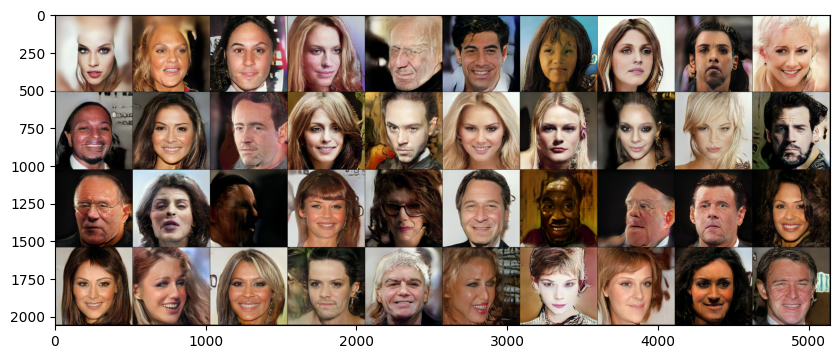

In [ ]:
print_grid(generated_images,10)

In [ ]:
# Generar lista de índices de las imágenes
smile_woman_ix = [9, 11, 32]
neutral_woman_ix = [0, 16, 18]
neutral_man_ix = [12, 19, 20]

In [ ]:
# Obtener vector promedio de atributo facial
def average_points(latent_point,vector):
    '''
        Input:
        - latent_point. Arreglo de vectores en el espacio de latencia
        - vector. Lista de indices
        Output:
        - all_vectors (tensor). Vectores en el espacio de latencia
        - avg_vector (tensor). Vector promedio del atributo facial en el espacio de latencia
    '''
    vectors = latent_point[vector]
    avg_vector = np.mean(vectors, axis=0) # Columna
    all_vectors = np.vstack((vectors, avg_vector))
    avg_vector = torch.from_numpy(avg_vector)
    all_vectors = torch.from_numpy(all_vectors)
    return all_vectors, avg_vector

In [ ]:
# Convertir tensor de vectores en el espacio de latencia a un arreglo numpy
latent_vec = noise.numpy()

In [ ]:
# Obtener vector promedio
lv_smilewoman, mean_smilewoman = average_points(latent_vec, smile_woman_ix)
lv_neutralwoman, mean_neutralwoman = average_points(latent_vec,neutral_woman_ix)
lv_neutralman, mean_neutralmen = average_points(latent_vec,neutral_man_ix)

In [ ]:
print(f"Tamaño del vector: {lv_smilewoman.shape}")

Tamaño del vector: torch.Size([4, 512])


#### Operación aritmética con los vectores promedio
***Mujer sonriendo - Mujer neutra + Hombre neutro = ?***

In [ ]:
# Operación aritmética entre los vectores promedio de los atributos faciales
vector_operation = mean_smilewoman - mean_neutralwoman + mean_neutralmen
print(vector_operation.shape)
vo = torch.unsqueeze(vector_operation, dim=0)
print(vo.shape)

torch.Size([512])
torch.Size([1, 512])


In [ ]:
# Generar imágenes de operaciones aritméticas
with torch.no_grad():
    image_sw = model.test(lv_smilewoman)
    image_nw = model.test(lv_neutralwoman)
    image_nm = model.test(lv_neutralman)
    image_op = model.test(vo)

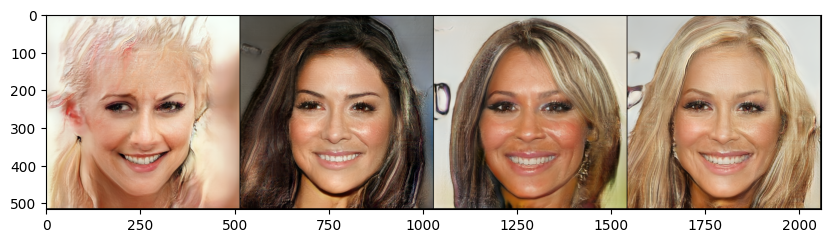

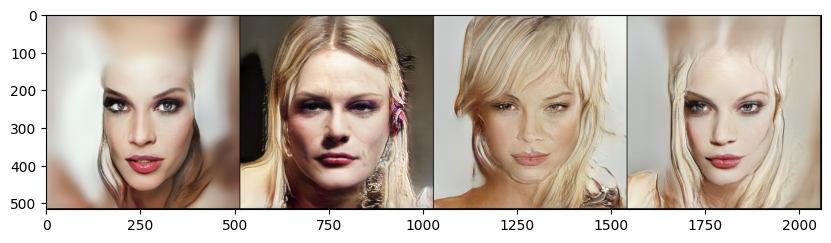

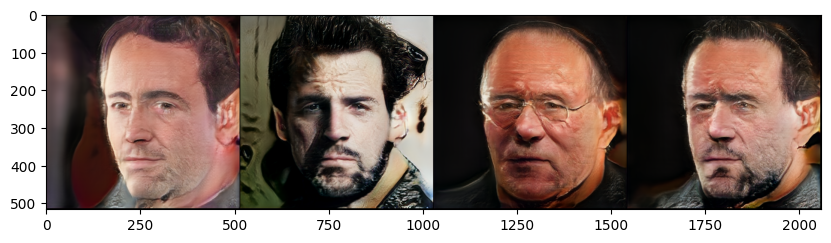

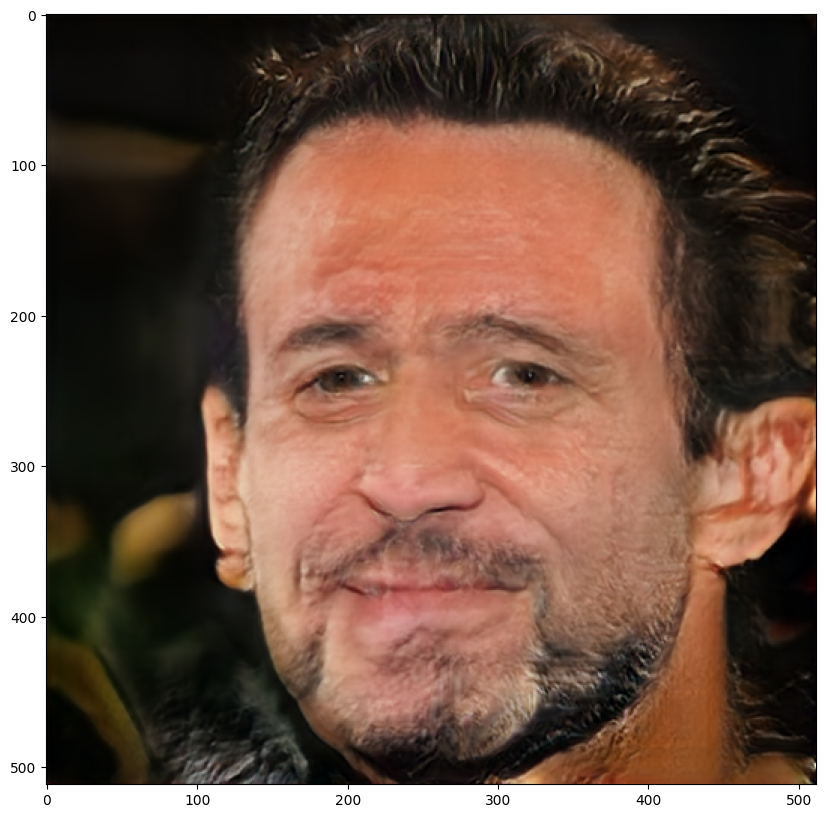

In [ ]:
print_grid(image_sw,4)
print_grid(image_nw,4)
print_grid(image_nm,4)
print_grid(image_op,1)

## Ejercicio
Realizar la siguiente operación aritmética  
***Mujer cabello rubio - Mujer cabello obscuro + Hombre cabello obscuro = ?***

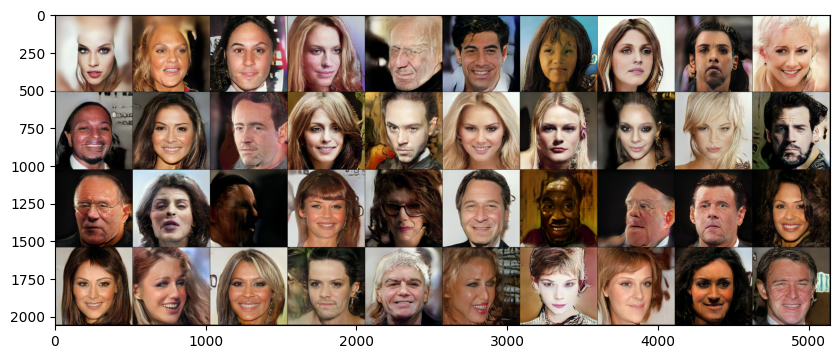

In [ ]:
print_grid(generated_images,10)

✍
Seleccionar al menos 3 indices de imágenes de:
- Mujer cabello rubia
- Mujer cabello obscuro
- Hombre cabello obscuro

In [ ]:
# Seleccionar indices de imágenes
blond_woman_ix = [0, 9, 18]
brunette_woman_ix = [6, 29, 38]
brunette_man_ix = [5, 28, 39]

✍
Obtener vectores promedio de las imágenes   
Pista: Utlizar función `average_points(latent_point,vector)`

In [ ]:
lv_blondwoman, mean_blondwoman = average_points(latent_vec, blond_woman_ix)
lv_brunettewoman, mean_brunettewoman = average_points(latent_vec,brunette_woman_ix)
lv_brunetteman, mean_brunettemen = average_points(latent_vec,brunette_man_ix)

✍
Generar operación con los vectores promedio en el espacio de latencia obtenidos en el paso anterior  
***Mean_mujer_crubio - Mean_mujer_cobscuro + Mean_hombre_cobscuro = ?***

In [ ]:
# Operación aritmética entre los vectores promedio de los atributos faciales
vector_operation = mean_blondwoman - mean_brunettewoman + mean_brunettemen
print(vector_operation.shape)
vo = torch.unsqueeze(vector_operation, dim=0)
print(vo.shape)

torch.Size([512])
torch.Size([1, 512])


✍
Utilizar modelo preentrenado para generar imagenes de:  
- Mujer de cabello rubio con vector promedio
- Mujer de cabello obscuro con vector promedio
- Hombre de cabello obscuro con vector promedio
- Vector resultante de la operación

In [ ]:
with torch.no_grad():
    image_sw = model.test(lv_blondwoman)
    image_nw = model.test(lv_brunettewoman)
    image_nm = model.test(lv_brunetteman)
    image_op = model.test(vo)

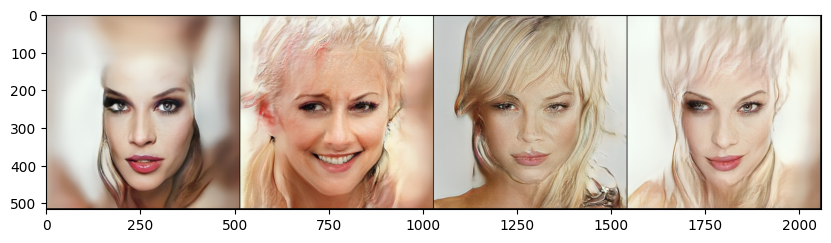

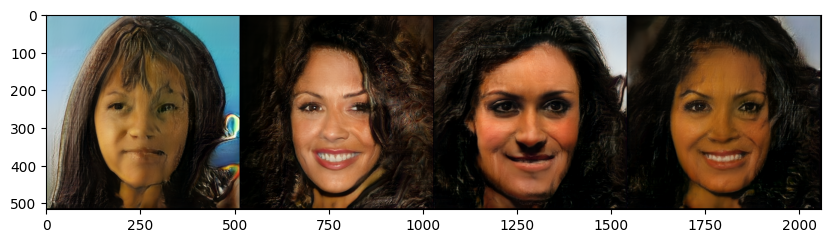

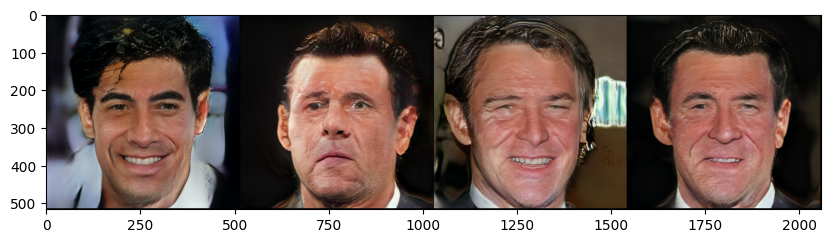

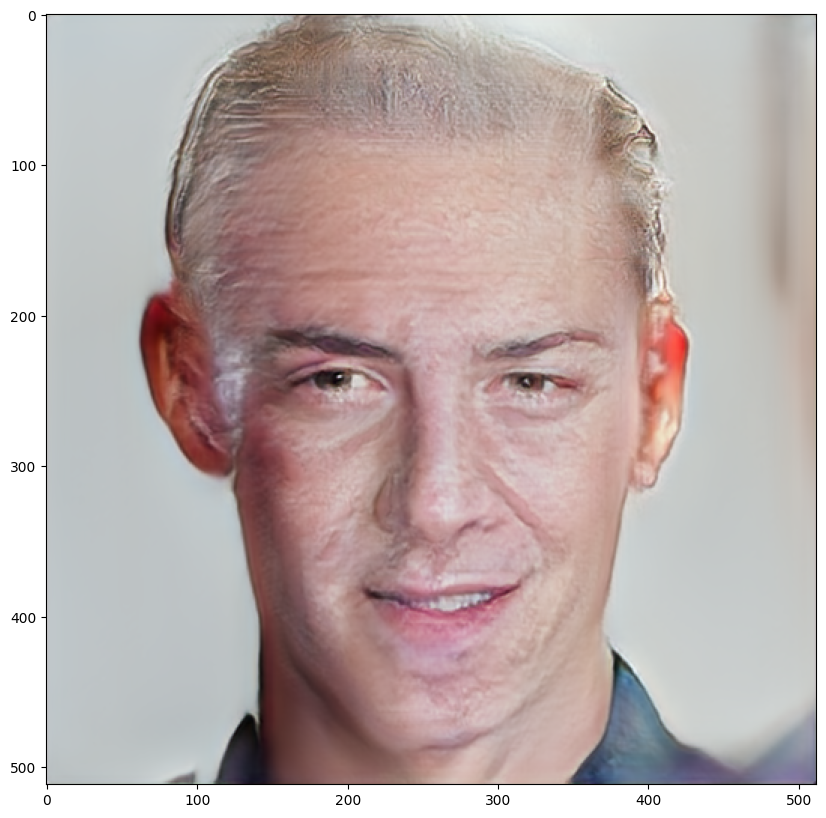

In [ ]:
# Visualizar imagenes
print_grid(image_sw,4)
print_grid(image_nw,4)
print_grid(image_nm,4)
print_grid(image_op,1)